<a href="https://colab.research.google.com/github/guimaraess2/Logistic-Regression/blob/master/Classes_desbalaceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Importando as bibliotecas/Import libraries** 



In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import ConfusionMatrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

**Carregando o dataset/Import dataset** 

In [ ]:
df = pd.read_csv('/content/sample_data/creditcard.csv')

**Olhando as primeiras 5 linhas/Looking at the first 5 lines**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Excluindo colunas irrelevantes/Deleting irrelevant columns**

In [ ]:
df=df.drop(['Time', 'Amount'], axis=1)

**Quantidade de linhas e colunas/Number of rows and columns**

In [ ]:
df.shape

(284807, 29)

**Distribuição das classes/Class distribuition**

In [ ]:
X = df.iloc[: , 0:28].values
y = df.iloc[: , -1].values


**Exibição dos valores nulos/Explore missing values**

In [ ]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

**Escalonização dos dados/Feature Scaling**

In [ ]:
scale = StandardScaler()
X = scale.fit_transform(X)

**Verificar a Distribuição dos dados da classe alvo/Check distribution of target_class column**





In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Valores da classe alvo em porcentagem/View the percentage distribution of target_class column**


In [ ]:
df['Class'].value_counts()/np.float(len(df))


0    0.998273
1    0.001727
Name: Class, dtype: float64

**Visualização dos dados/Data visualization**

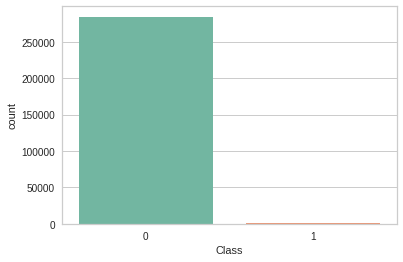

In [ ]:

ax=sns.countplot(x="Class", palette="Set2", data=df)

**Instanciando a classe de regressão logística/Create an instance of a class**

In [ ]:
lr = LogisticRegression()

**Separando os dados em classes de treinamento e teste/Split data into separate training and test set**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

**Treinando o modelo/Training the model**

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

**Relatório de classificação/Classification report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



**Matriz de confusão/Confusion Matrix**

In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=["Real"], colnames=["Predito"], margins=True))

Predito      0    1    All
Real                      
0        85285   11  85296
1           56   91    147
All      85341  102  85443


**Aplicando o técnica de SMOTE/Applying the SMOTE technique**

In [ ]:
smt = SMOTE(random_state=2)

In [ ]:
X, y =smt.fit_resample(X,y)


In [ ]:
np.bincount(y)

array([284315, 284315])

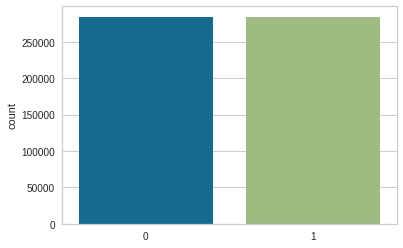

In [ ]:
ax = sns.countplot(x=y)


In [ ]:
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
print(pd.crosstab(y_test, y_pred, rownames=["Real"], colnames=["Predito"], margins=True))

Predito      0    1    All
Real                      
0        85285   11  85296
1           56   91    147
All      85341  102  85443


**Conclusões/Conclusions**

In [ ]:
print("Antes de aplicar o SMOTE, a contagem de rótulo '1' era = {} \n".format(sum(y_train == 1)))
print("Antes de aplicar o SMOTE, a contagem de rótulo '0' era = {} \n".format(sum(y_train == 0)))

Antes de aplicar o SMOTE, a contagem de rótulo '1' era = 345 

Antes de aplicar o SMOTE, a contagem de rótulo '0' era = 199019 



In [ ]:
print("Após aplicar o SMOTE, a contagem de rótulo '1' é = {} \n".format(sum(y_train_smt == 1)))
print("Após aplicar o SMOTE, a contagem de rótulo '0' é = {} \n".format(sum(y_train_smt == 0)))

Após aplicar o SMOTE, a contagem de rótulo '1' é = 198898 

Após aplicar o SMOTE, a contagem de rótulo '0' é = 199143 

